# Benson Challenge

In [62]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Challenge 1

In [63]:
import pandas as pd

# Do not fill in the number of the csv file name!
first_date_of_csv = "03/30/2019"
# 7 days prior to csv file name.
span_of_days = 42

# def csv_to_df(data_date):
#     csv_file = "turnstile_{}.txt"
#     dfs = []
#     for date in data_date:
#         data_file = csv_file.format(date)
#         dfs.append(pd.read_csv(data_file))
#     return pd.concat(dfs)

# data_date = ["190406", "190413", "190420", "190427", "190504", "190511"]
# df = csv_to_df(data_date)

In [64]:
def get_data(week_nums):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [190406, 190413, 190420, 190427, 190504, 190511]
df = get_data(week_nums)

In [65]:
#turnstiles_reg = pd.read_csv(working_directory+'turnstile_data_reg_dt_format.csv', parse_dates=['date', 'date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225024 entries, 0 to 204087
Data columns (total 11 columns):
C/A                                                                     1225024 non-null object
UNIT                                                                    1225024 non-null object
SCP                                                                     1225024 non-null object
STATION                                                                 1225024 non-null object
LINENAME                                                                1225024 non-null object
DIVISION                                                                1225024 non-null object
DATE                                                                    1225024 non-null object
TIME                                                                    1225024 non-null object
DESC                                                                    1225024 non-null object
ENTRIES                 

In [66]:
df = df[df.DESC == "REGULAR"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219815 entries, 0 to 204087
Data columns (total 11 columns):
C/A                                                                     1219815 non-null object
UNIT                                                                    1219815 non-null object
SCP                                                                     1219815 non-null object
STATION                                                                 1219815 non-null object
LINENAME                                                                1219815 non-null object
DIVISION                                                                1219815 non-null object
DATE                                                                    1219815 non-null object
TIME                                                                    1219815 non-null object
DESC                                                                    1219815 non-null object
ENTRIES                 

### checking data frame

In [67]:
df.head()
#df.tail()
#df.info()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781


### Clean column names

In [68]:
def rename_columns():
    column_names = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES','EXITS']
    df.columns = [x.lower() for x in column_names]
rename_columns()

### checking unique elements

In [69]:
#df.groupby("time").time.count().sort_values(ascending = False)
#00: and 01: already comprise of 90% of the data! 10% of turnstiles don't submit the first data around midnight!
#df.groupby("date").date.count()
#df.entries.sort_values()

# Challenge 2

In [70]:
import dateutil.parser
from datetime import date

def produce_day_hour_column():
    par_funct = lambda row: dateutil.parser.parse(row["date"] + " " + row["time"])
    df["datetime"] = df.apply(par_funct, axis = 1)
    df["day"] = [x.day for x in df.datetime]
    df["hour"] = [x.hour for x in df.datetime]
produce_day_hour_column()

In [71]:
df.head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568,2019-03-30 00:00:00,30,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576,2019-03-30 04:00:00,30,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622,2019-03-30 08:00:00,30,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710,2019-03-30 12:00:00,30,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781,2019-03-30 16:00:00,30,16


# Challenge 3

In [72]:
turnstile_id = ["c/a", "unit", "scp", "station"]
turnstile_id_date = turnstile_id + ["date"]

### checking everything

In [73]:
#df.groupby(turnstile_id).entries.count()
#df.groupby(turnstile_id_date).entries.count().sort_values()
#entry_and_time_col = ["entries", "date", "hour"]
#df.groupby(turnstile_id_date).hour.min().value_counts()
#dump all the data that starts after 4am (only 1 percent of total data)

In [74]:
#mask_test = ((df["c/a"] == "PTH18") & (df["unit"] == "R549") & (df["scp"] == "01-01-03") & (df["station"] == "NEWARK BM BW"))

In [75]:
# are all the cumulative entry counts integers? If function returns nan, cleaning algorithm will be needed
def integer_check():
    for i, value in enumerate(df.entries):
        if type(value) != int:
            print(value)
        elif i == len(df.entries) - 1:
            print("all are int!")
integer_check()
#might need to clean up the entire record of turnstiles that contains nan
df.info()

all are int!
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219815 entries, 0 to 204087
Data columns (total 14 columns):
c/a         1219815 non-null object
unit        1219815 non-null object
scp         1219815 non-null object
station     1219815 non-null object
linename    1219815 non-null object
division    1219815 non-null object
date        1219815 non-null object
time        1219815 non-null object
desc        1219815 non-null object
entries     1219815 non-null int64
exits       1219815 non-null int64
datetime    1219815 non-null datetime64[ns]
day         1219815 non-null int64
hour        1219815 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 139.6+ MB


# Drop duplicate to keep the earilest data each day

In [76]:
def keep_earliest_hour():
    df1 = df.sort_values('hour', ascending=True).drop_duplicates(turnstile_id_date)
    return df1.sort_values(turnstile_id_date).reset_index(drop=True)
df_keep_earliest_hour = keep_earliest_hour()

In [77]:
#df_keep_earliest_hour.info()
#df_keep_earliest_hour is the daily cumulative count
#df_keep_earliest_hour.hour.value_counts()
#now drop the rows recorded after 4am
#df_keep_earliest_hour.tail()

### drop data after 4am

In [78]:
#some turnstiles submit the first data of each day at noon, we can't do the daily count based on them.
def keep_midnight():
    return df_keep_earliest_hour[df_keep_earliest_hour.hour < 4].reset_index(drop=True)
df_keep_midnight = keep_midnight()
#df_keep_midnight.hour.value_counts()
#df_keep_midnight

### checking if turnstiles all have day_span days of data

In [79]:
 df_keep_midnight.groupby(turnstile_id).entries.count().value_counts()
# 5% of the data has missing day, if wednesday is missing, we might have 
#Wednesday_daily_count = Thursday_cumulative_count - Tuesday_cumulative_count, more cleaning needed!

42    3567
41     818
40     182
39      96
38      63
37      39
36      30
30      12
34       8
35       8
31       6
24       6
8        5
18       5
25       3
28       3
16       3
21       1
29       1
32       1
23       1
33       1
Name: entries, dtype: int64

# Filter rows with less than 42 days of data
### filter rows by results of groupby!

In [80]:
def filter_date_span():
    return df_keep_midnight.groupby(turnstile_id).filter(lambda x: x["entries"].count() > span_of_days -1 ).reset_index(drop=True)
df_filter_date_span = filter_date_span()

In [81]:
df_filter_date_span.info()
#checking the day span is correct
#df_filter_date_span.groupby(turnstile_id).entries.count().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149814 entries, 0 to 149813
Data columns (total 14 columns):
c/a         149814 non-null object
unit        149814 non-null object
scp         149814 non-null object
station     149814 non-null object
linename    149814 non-null object
division    149814 non-null object
date        149814 non-null object
time        149814 non-null object
desc        149814 non-null object
entries     149814 non-null int64
exits       149814 non-null int64
datetime    149814 non-null datetime64[ns]
day         149814 non-null int64
hour        149814 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 16.0+ MB


# Check the cleaning process again

In [82]:
# df_filter_date_span.info()
# df_filter_date_span.tail()
# df_filter_date_span.columns
# df_filter_date_span.sample(n = 5, random_state= 41)
# df_filter_date_span.hour.value_counts()
# df_filter_date_span.groupby(turnstile_id).date.count().value_counts()
# df_filter_date_span.entries.max()
#2 billions almost equals to 2 ** 31 , is there a upper limit at which cumulative count got resetted?

# Daily entries count

In [83]:
def order_by_date():
    return df_filter_date_span.sort_values(turnstile_id_date).reset_index(drop = True)
df_order_by_date = order_by_date()
#df_order_by_date.count()
# df_order_by_date

In [84]:
#produce subframe to compute the daily entries, then concatenate to the original dataframe
def diff_daily_count():
    df_sub = df_filter_date_span[["entries"]]
    df_daily_count = df_sub.diff()
    df_daily_count.columns = ["daily_count"]
    return pd.concat([df_order_by_date, df_daily_count], axis=1).reset_index(drop=True)
df_diff_daily_count = diff_daily_count()
#df_diff_daily_count.head()

### add previous day 

In [85]:
def add_prev_day():
    df_day = df_diff_daily_count[["date"]]
    df_day_shifted = df_day.shift()
    df_day_shifted.columns = ["prev_date"]
    return pd.concat([df_diff_daily_count, df_day_shifted], axis=1)
df_add_prev_day = add_prev_day()
df_add_prev_day.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour,daily_count,prev_date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568,2019-03-30,30,0,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2019,00:00:00,REGULAR,6999957,2373867,2019-03-31,31,0,893.0,03/30/2019
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2019,00:00:00,REGULAR,7000528,2374095,2019-04-01,1,0,571.0,03/31/2019
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2019,00:00:00,REGULAR,7002087,2374579,2019-04-02,2,0,1559.0,04/01/2019
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2019,00:00:00,REGULAR,7003680,2375133,2019-04-03,3,0,1593.0,04/02/2019


### subtraction produces nan, drop the first day!

In [86]:
def drop_first_day():
    return df_add_prev_day[(df_add_prev_day.date != first_date_of_csv)].reset_index(drop=True)
turnstile_df = drop_first_day()

In [87]:
turnstile_df.date.nunique()

41

# drop positive and negative outliers in daily_entry column

In [88]:
#all the remaining turnstiles records data during the time span

In [89]:
#turnstile_df[(turnstile_df.daily_count > 20000)]
#1.8 billion of people went through a turnstile machine in one day?! That's 4 times the US population!

In [90]:
#by looking at the busiest stations we set the daily count upper bound to 20000
max_daily_cap = 20000
def drop_positive_outlier():
    return turnstile_df.groupby(turnstile_id).filter(lambda x: x['daily_count'].max()< max_daily_cap).reset_index(drop=True)
df_drop_p_outlier = drop_positive_outlier()

In [91]:
# df_drop_p_outlier[(df_drop_p_outlier.daily_count >max_daily_cap)]
# df_drop_p_outlier[(df_drop_p_outlier.daily_count < 0 )]

In [92]:
#now drop the neqative data, and the remaining data is sparkling clean!
def cleaned_data():
    return df_drop_p_outlier.groupby(turnstile_id).filter(lambda x: x['daily_count'].min() > 0).reset_index(drop=True)
df_cleaned = cleaned_data()
#df_cleaned[(df_cleaned.daily_count < 0)]

In [93]:
df_cleaned.desc.value_counts()

REGULAR    97949
Name: desc, dtype: int64

# Challenge 4

In [94]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

mask = ((df_cleaned["c/a"] == "A002") & 
(df_cleaned["unit"] == "R051") & 
(df_cleaned["scp"] == "02-00-00") & 
(df_cleaned["station"] == "59 ST"))
# datetime is both name of module and name of constructor of datetime object
df_cleaned

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour,daily_count,prev_date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2019,00:00:00,REGULAR,6999957,2373867,2019-03-31 00:00:00,31,0,893.0,03/30/2019
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2019,00:00:00,REGULAR,7000528,2374095,2019-04-01 00:00:00,1,0,571.0,03/31/2019
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2019,00:00:00,REGULAR,7002087,2374579,2019-04-02 00:00:00,2,0,1559.0,04/01/2019
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2019,00:00:00,REGULAR,7003680,2375133,2019-04-03 00:00:00,3,0,1593.0,04/02/2019
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2019,00:00:00,REGULAR,7005332,2375557,2019-04-04 00:00:00,4,0,1652.0,04/03/2019
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/05/2019,00:00:00,REGULAR,7006970,2376068,2019-04-05 00:00:00,5,0,1638.0,04/04/2019
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/06/2019,00:00:00,REGULAR,7008540,2376546,2019-04-06 00:00:00,6,0,1570.0,04/05/2019
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/07/2019,00:00:00,REGULAR,7009464,2376791,2019-04-07 00:00:00,7,0,924.0,04/06/2019
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2019,00:00:00,REGULAR,7010160,2377000,2019-04-08 00:00:00,8,0,696.0,04/07/2019
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/09/2019,00:00:00,REGULAR,7011693,2377460,2019-04-09 00:00:00,9,0,1533.0,04/08/2019


[Text(0, 0.5, 'daily entries'),
 Text(0.5, 0, 'date'),
 Text(0.5, 1.0, 'Daily Traffic for 59 ST station')]

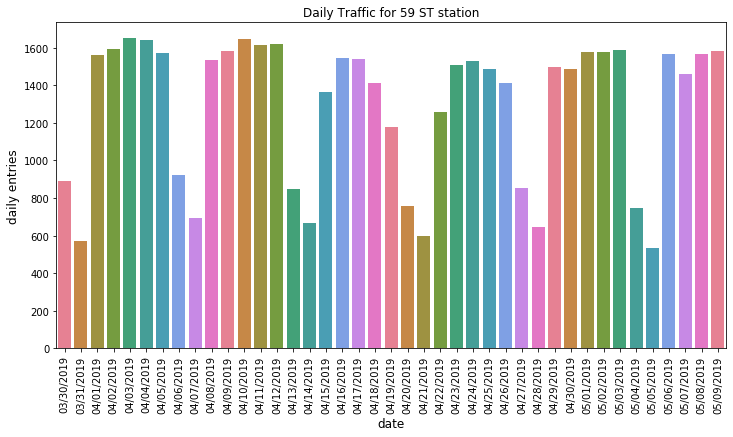

In [95]:
one_turnstile = df_cleaned[mask]
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'prev_date',y='daily_count',data= one_turnstile, palette = sns.color_palette("husl", 10));
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='date', ylabel='daily entries', title='Daily Traffic for 59 ST station')

    

In [96]:
#df_cleaned.info()

In [97]:
#df_cleaned[((df_cleaned.date ==     "    "  ) & (df_cleaned.daily_count > 5000))][["station", "daily_count"]]

# Analysis over a single week

In [98]:
#we choose a condition to consider data in a single week.
one_week_condition = (df_cleaned.day >= 2) & (df_cleaned.day <= 8)

In [99]:
df_cleaned[one_week_condition & (df_cleaned.station == "GRD CNTRL-42 ST")]\
.groupby(["station", "day"]).daily_count.sum().sort_values()

station          day
GRD CNTRL-42 ST  8       77393.0
                 6       78191.0
                 7       81895.0
                 5       85125.0
                 4      124320.0
                 2      131303.0
                 3      132719.0
Name: daily_count, dtype: float64

In [100]:
df_cleaned[one_week_condition & (df_cleaned.station == "34 ST-PENN STA")]\
.groupby(["station", "day"]).daily_count.sum().sort_values()

station         day
34 ST-PENN STA  8      191692.0
                6      193170.0
                7      199254.0
                5      204313.0
                4      257401.0
                3      259471.0
                2      259485.0
Name: daily_count, dtype: float64

In [101]:
#different stations
df_cleaned.station.nunique()

296

In [102]:
df_cleaned.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour,daily_count,prev_date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2019,00:00:00,REGULAR,6999957,2373867,2019-03-31,31,0,893.0,03/30/2019
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2019,00:00:00,REGULAR,7000528,2374095,2019-04-01,1,0,571.0,03/31/2019
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2019,00:00:00,REGULAR,7002087,2374579,2019-04-02,2,0,1559.0,04/01/2019
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2019,00:00:00,REGULAR,7003680,2375133,2019-04-03,3,0,1593.0,04/02/2019
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2019,00:00:00,REGULAR,7005332,2375557,2019-04-04,4,0,1652.0,04/03/2019


In [140]:
def map_day_of_week(value):
    if value == 0:
        return 'Sunday'
    elif value == 1:
        return 'Monday'
    elif value == 2:
        return 'Tuesday'
    elif value == 3:
        return 'Wednesday'
    elif value == 4:
        return 'Thursday'
    elif value == 5:
        return 'Friday'
    elif value == 6:
        return 'Saturday'

df_cleaned['weekday'] = df_cleaned.datetime.dt.dayofweek.apply(map_day_of_week)

In [141]:
df_cleaned.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour,daily_count,prev_date,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2019,00:00:00,REGULAR,6999957,2373867,2019-03-31,31,0,893.0,03/30/2019,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2019,00:00:00,REGULAR,7000528,2374095,2019-04-01,1,0,571.0,03/31/2019,Sunday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2019,00:00:00,REGULAR,7002087,2374579,2019-04-02,2,0,1559.0,04/01/2019,Monday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2019,00:00:00,REGULAR,7003680,2375133,2019-04-03,3,0,1593.0,04/02/2019,Tuesday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2019,00:00:00,REGULAR,7005332,2375557,2019-04-04,4,0,1652.0,04/03/2019,Wednesday


In [142]:
df_cleaned['weekday'] = pd.Categorical(df_cleaned['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True)

In [143]:
df_cleaned.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day,hour,daily_count,prev_date,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2019,00:00:00,REGULAR,6999957,2373867,2019-03-31,31,0,893.0,03/30/2019,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2019,00:00:00,REGULAR,7000528,2374095,2019-04-01,1,0,571.0,03/31/2019,Sunday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2019,00:00:00,REGULAR,7002087,2374579,2019-04-02,2,0,1559.0,04/01/2019,Monday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2019,00:00:00,REGULAR,7003680,2375133,2019-04-03,3,0,1593.0,04/02/2019,Tuesday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2019,00:00:00,REGULAR,7005332,2375557,2019-04-04,4,0,1652.0,04/03/2019,Wednesday


## station daily entry

In [144]:
df_station_daily = df_cleaned[one_week_condition].groupby(["station", "weekday", "prev_date"], as_index=False)\
.agg({"daily_count" : "sum"})
df_station_daily[df_station_daily.station == "34 ST-PENN STA"].head(7)

,station,weekday,prev_date,daily_count
644,34 ST-PENN STA,Monday,04/01/2019,129764.0
645,34 ST-PENN STA,Monday,05/06/2019,124512.0
646,34 ST-PENN STA,Tuesday,04/02/2019,129841.0
647,34 ST-PENN STA,Tuesday,05/07/2019,126855.0
648,34 ST-PENN STA,Wednesday,04/03/2019,131244.0
649,34 ST-PENN STA,Wednesday,05/01/2019,129721.0
650,34 ST-PENN STA,Thursday,04/04/2019,131297.0


[Text(0, 0.5, 'daily entries'), Text(0.5, 1.0, 'Penn Station Weekly Traffic')]

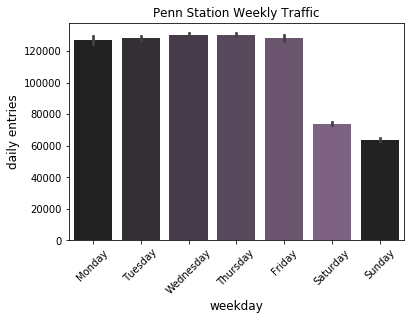

In [145]:
df_penn = df_station_daily[df_station_daily["station"] == "34 ST-PENN STA"]
ax = sns.barplot(x = 'weekday',y='daily_count',data= df_penn, palette = sns.dark_palette("muted purple", input="xkcd"));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(ylabel='daily entries', title='Penn Station Weekly Traffic')

## station weekly total

In [146]:
df_station_weekly =  df_station_daily.groupby(["station"], as_index = False)\
.agg({"daily_count": "sum" }).sort_values(["daily_count"], ascending=False).reset_index(drop=True)

[Text(0, 0.5, 'daily entries'),
 Text(0.5, 1.0, 'Top 5 Stations with Highest Traffic')]

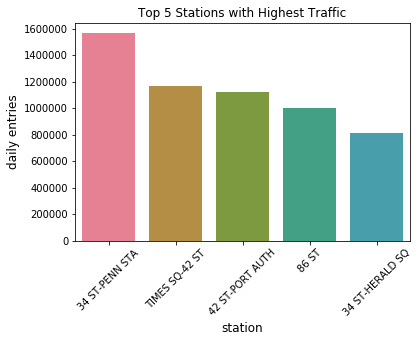

In [147]:
top_stations = df_station_weekly[df_station_weekly.daily_count > 815000]
ax = sns.barplot(x = 'station',y='daily_count', data = top_stations, palette = sns.color_palette("husl", 7));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(ylabel='daily entries', title='Top 5 Stations with Highest Traffic')

## weekly_total MTA count by day of week

[Text(0, 0.5, 'daily entries'), Text(0.5, 1.0, 'MTA Weekday Traffic Totals')]

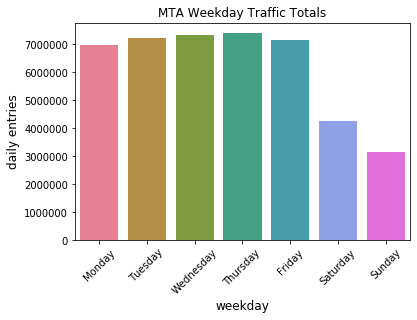

In [148]:
#to compare which day is the busiest day of week:
weekly_total_mta = df_cleaned[one_week_condition].groupby(["weekday"], as_index=False).daily_count.sum()
plt.rcParams["axes.labelsize"] = 12
ax = sns.barplot(x = 'weekday',y='daily_count', data = weekly_total_mta, palette = sns.color_palette("husl", 7));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(ylabel='daily entries', title='MTA Weekday Traffic Totals')

## Daily Entries by Week for One Station

In [149]:
df_cleaned = df_cleaned.groupby(['station', 'date']).daily_count.agg({'daily_count': 'sum'})
df_cleaned.head()
# penn_station = df_cleaned[df_cleaned['station'] == "34 ST-PENN STA"]
# dates = [dateutil.parser.parse(date) for date in penn_station['prev_date'].values]
# counts = penn_station['daily_count'].values


/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


daily_count
station date                   
1 AV    03/31/2019       5813.0
        04/01/2019       3982.0
        04/02/2019       5677.0
        04/03/2019       7748.0
        04/04/2019       8240.0

[Text(20.200000000000003, 0.5, 'Total Entries'),
 Text(0.5, 20.19999999999999, 'Date'),
 Text(0.5, 1, 'Total Traffic From 4/06 - 5/11 For Penn Station')]

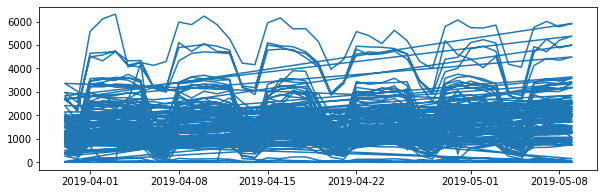

In [150]:
plt.figure(figsize= (10,3))
plt.plot(dates, counts)
ax.set(xlabel='Date', ylabel='Total Entries', title='Total Traffic From 4/06 - 5/11 For Penn Station')